In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

import qiskit
from qiskit.tools.visualization import circuit_drawer, plot_histogram, plot_state
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QuantumProgram
from qiskit import available_backends, execute

In [2]:
%load_ext autoreload
%autoreload 2
import utils

In [3]:
def most_probable_result(result):
    max_tuple = max(result.get_counts().items(), key=lambda x: x[1])
    return max_tuple[0]

In [152]:
n = 3  # Number of qubits.
string = [1, 0, 1]

n_iter = int(np.sqrt(n) + 1) # iterate sqrt(N) times
# n_iter = 2

# qc = utils.build_grover_search_qc(n, n_iter, string)

# phone = QuantumRegister(n, name='phone')
# qc.add(phone)
# ansphone = ClassicalRegister(n, name='ansphone')
# qc.add(ansphone)

# qc.cx(qc.get_qregs()['fin'], qc.get_qregs()['phone'])

# qc.measure(qc.get_qregs()['fin'], qc.get_cregs()['ans'])
# qc.measure(qc.get_qregs()['phone'], qc.get_cregs()['ansphone'])

In [75]:
# if measure:
#     result = execute(qc, backend='local_qasm_simulator',
#                           shots=8192).result()
#     plot_histogram(result.get_counts())
# else:
#     statevector = execute(qc, backend='local_statevector_simulator_py',
#                           shots=1).result().get_data()['statevector']
#     statevector = statevector[:2 ** n]
#     utils.plot_statevector(statevector)

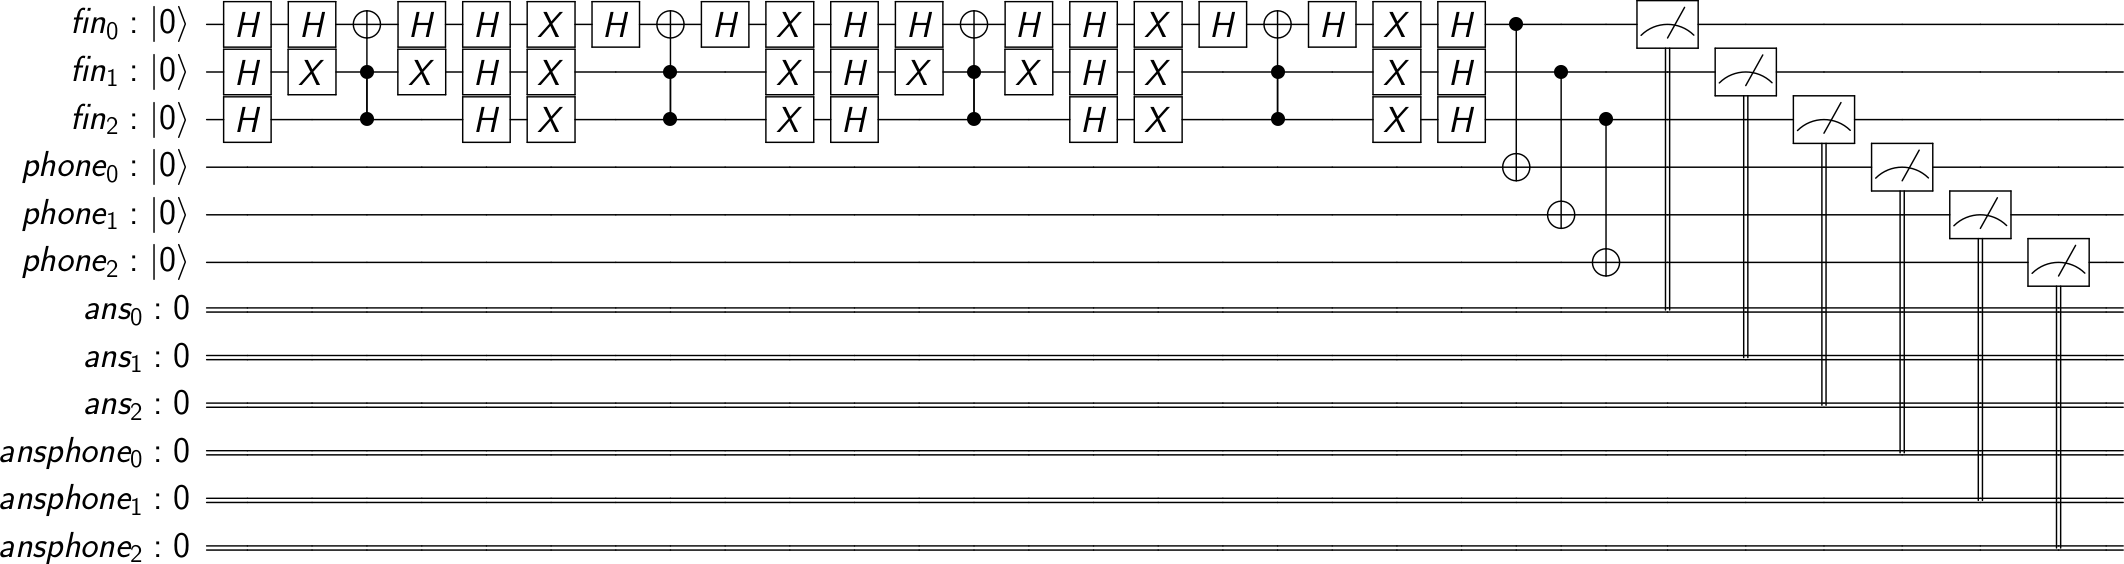

In [76]:
circuit_drawer(qc)

In [79]:
def plot_histogram(data, title=None, number_to_keep=False, name_mapping=None):
    """Plot a histogram of data.

    data is a dictionary of  {'000': 5, '010': 113, ...}
    number_to_keep is the number of terms to plot and rest is made into a
    single bar called other values
    """
    if number_to_keep is not False:
        data_temp = dict(Counter(data).most_common(number_to_keep))
        data_temp["rest"] = sum(data.values()) - sum(data_temp.values())
        data = data_temp

    labels = sorted(data)
    values = np.array([data[key] for key in labels], dtype=float)
    pvalues = values / sum(values)
    numelem = len(values)
    ind = np.arange(numelem)  # the x locations for the groups
    width = 0.35  # the width of the bars
    _, ax = plt.subplots()
    rects = ax.bar(ind, pvalues, width, color='dodgerblue')
    # add some text for labels, title, and axes ticks
    ax.set_ylabel('Probability', fontsize=12)
    ax.set_xticks(ind)
    
    if name_mapping:
        n = len(list(name_mapping.keys())[0])
        labels = [name_mapping[x[-n:]] for x in labels]
    
    if title:
        ax.set_title(title)
    
    ax.set_xticklabels(labels, fontsize=12, rotation=70)
    ax.set_ylim([0., min([1.2, max([1.2 * val for val in pvalues])])])
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
                '%.2f' % float(height),
                ha='center', va='bottom')
    plt.show()

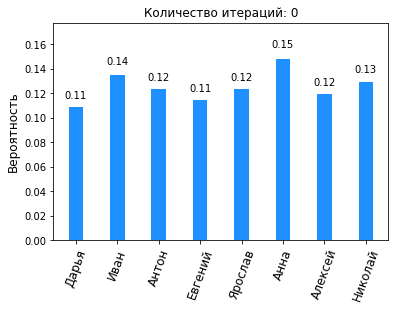

In [201]:
i = 0

qc = utils.build_grover_search_qc(n, i, query)

phone = QuantumRegister(n, name='Phone')
qc.add(phone)
ansphone = ClassicalRegister(n, name='PhoneAns')
qc.add(ansphone)

qc.cx(qc.get_qregs()['Name'], qc.get_qregs()['Phone'])

qc.measure(qc.get_qregs()['Name'], qc.get_cregs()['NameAns'])
qc.measure(qc.get_qregs()['Phone'], qc.get_cregs()['PhoneAns'])

# plt.figure(figsize=(10,10))
# im = circuit_drawer(qc)
# plt.imshow(im)
# plt.show()

result = execute(qc, backend='local_qasm_simulator', shots=shots).result()
plot_histogram(result.get_counts(), title='Количество итераций: {}'.format(i),
               name_mapping=name_mapping)

# number, name = most_probable_result(result).split()

In [73]:
# name_mapping = {
#     '000': 'Дарья',
#     '001': 'Иван',
#     '010': 'Антон',
#     '011': 'Евгений',
#     '100': 'Ярослав',
#     '101': 'Анна',
#     '110': 'Алексей',
#     '111': 'Николай'
# }

name_mapping = {
    '000': 'Darya',
    '001': 'Ivan',
    '010': 'Anton',
    '011': 'Evgeniy',
    '100': 'Yaroslav',
    '101': 'Anna',
    '110': 'Alexey',
    '111': 'Nikolay'
}

number_mapping = {
    '000': '+36-59',
    '001': '+48-92',
    '010': '+25-47',
    '011': '+81-50',
    '100': '+18-97',
    '101': '+54-51',
    '110': '+10-09',
    '111': '+81-51'
}

name_mapping_inv = dict(zip(name_mapping.values(), name_mapping.keys()))
number_mapping_inv = dict(zip(number_mapping.values(), number_mapping.keys()))

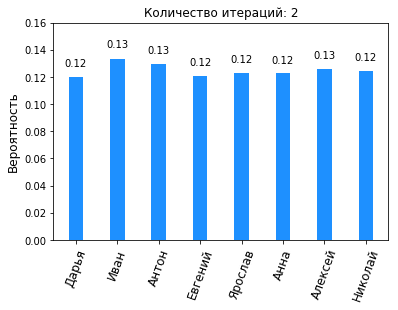

Имя: Иван
Номер телефона: +48-92


In [203]:
result = execute(qc, backend='local_qasm_simulator',
                 shots=8192).result()
plot_histogram(result.get_counts(), title='Number of iterations: 2', name_mapping=name_mapping)

number, name = most_probable_result(result).split()
print('Имя:', name_mapping[name])
print('Номер телефона:', number_mapping[number])

In [74]:
n = 3  # Number of qubits.
n_iter = int(np.sqrt(n) + 1) # iterate sqrt(N) times

query_name = 'Ivan'
query = name_mapping_inv[query_name]
query

'001'

In [75]:
assert n == len(query)

shots = 1000

print('Searching by name: "{}" -> "{}"'.format(query_name, query))

for i in range(n_iter + 1):
    qc = utils.build_grover_search_qc(n, i, query)

    phone = QuantumRegister(n, name='phone')
    qc.add(phone)
    ansphone = ClassicalRegister(n, name='ansphone')
    qc.add(ansphone)

    qc.cx(qc.get_qregs()['fin'], qc.get_qregs()['phone'])

    qc.measure(qc.get_qregs()['fin'], qc.get_cregs()['ans'])
    qc.measure(qc.get_qregs()['phone'], qc.get_cregs()['ansphone'])
    
    plt.figure(figsize=(10,10))
    im = circuit_drawer(qc)
    plt.imshow(im)
    plt.show()
    
    result = execute(qc, backend='local_qasm_simulator', shots=shots).result()
    plot_histogram(result.get_counts(), title='Number of iterations: {}'.format(i),
                   name_mapping=name_mapping)

    number, name = most_probable_result(result).split()
    print('Name: "{}" -> "{}"'.format(name, name_mapping[name]))
    print('Phone number:', number_mapping[number])
    
    print('')
    print('=== === ===')
    print('')

Searching by name: "Ivan" -> "001"


KeyError: 'fin'

In [82]:
print('Searching by name: "{}" -> "{}"'.format(query_name, query))

Searching by name: "Ivan" -> "001"


In [18]:
shots = 1000

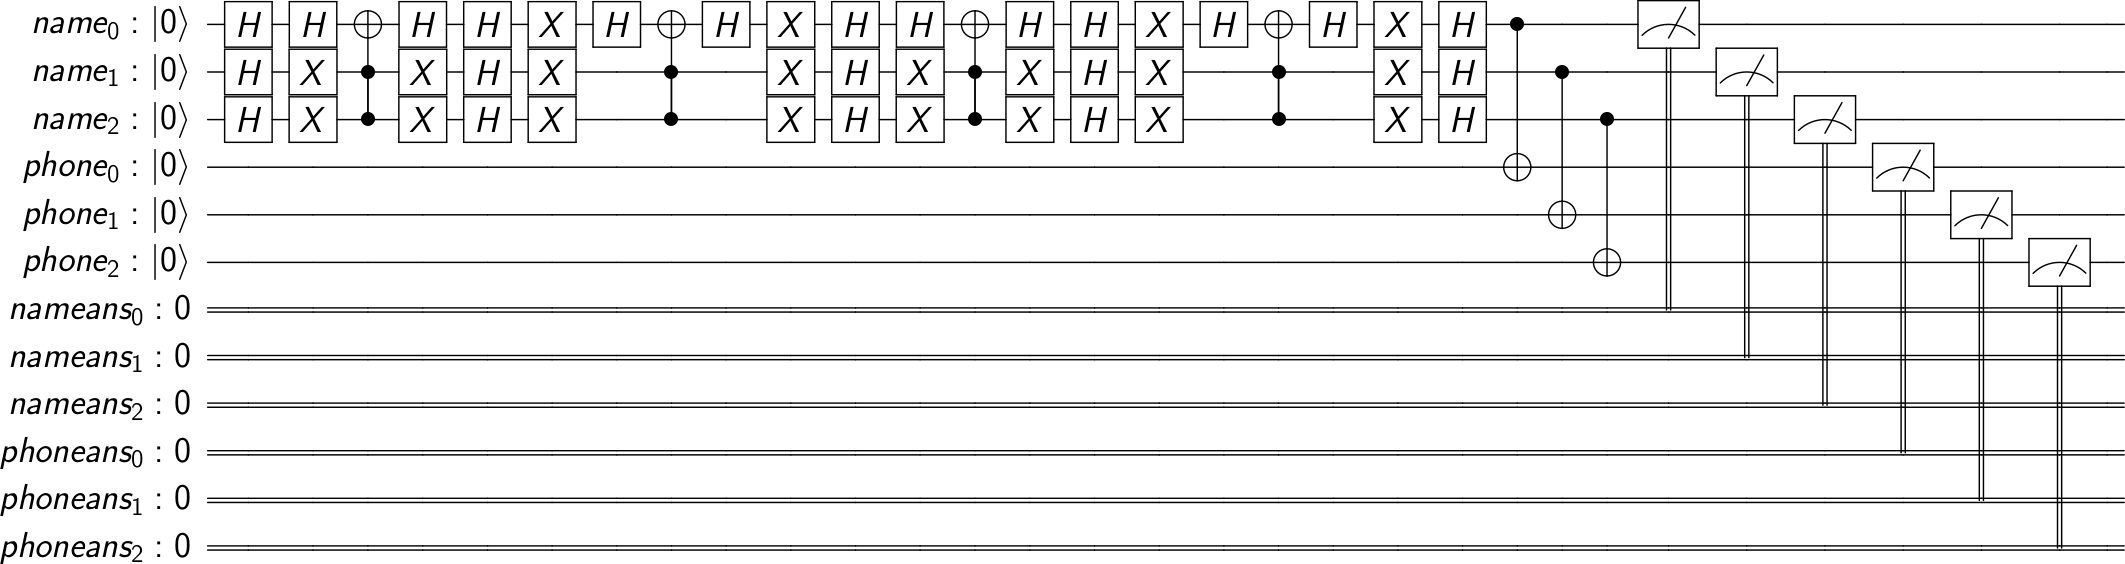

In [85]:
i = 2

qc = utils.build_grover_search_qc(n, i, query)

phone = QuantumRegister(n, name='phone')
qc.add(phone)
ansphone = ClassicalRegister(n, name='phoneans')
qc.add(ansphone)

qc.cx(qc.get_qregs()['name'], qc.get_qregs()['phone'])

qc.measure(qc.get_qregs()['name'], qc.get_cregs()['nameans'])
qc.measure(qc.get_qregs()['phone'], qc.get_cregs()['phoneans'])

circuit_drawer(qc)

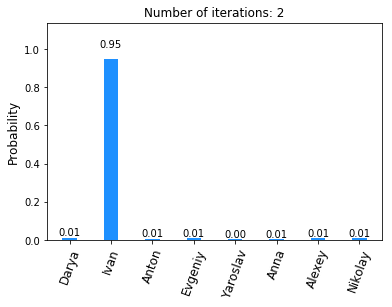

Name: "001" -> "Ivan"
Phone number: +48-92

=== === ===



In [86]:
result = execute(qc, backend='local_qasm_simulator', shots=shots).result()
plot_histogram(result.get_counts(), title='Number of iterations: {}'.format(i),
               name_mapping=name_mapping)

number, name = most_probable_result(result).split()
print('Name: "{}" -> "{}"'.format(name, name_mapping[name]))
print('Phone number:', number_mapping[number])

print('')
print('=== === ===')
print('')

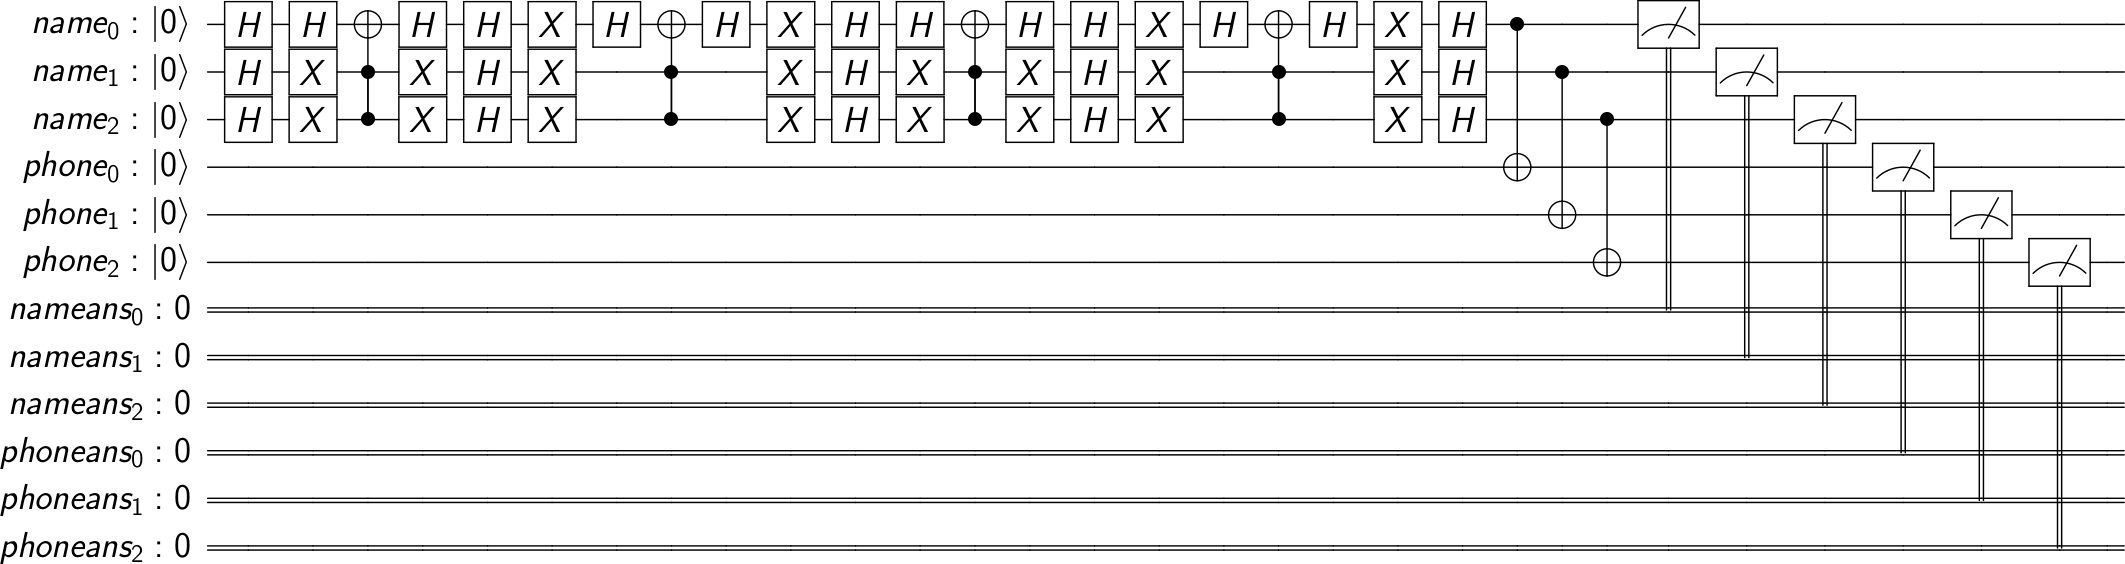

In [29]:
i = 2

qc = utils.build_grover_search_qc(n, i, query)

phone = QuantumRegister(n, name='phone')
qc.add(phone)
ansphone = ClassicalRegister(n, name='phoneans')
qc.add(ansphone)

qc.cx(qc.get_qregs()['name'], qc.get_qregs()['phone'])

qc.measure(qc.get_qregs()['name'], qc.get_cregs()['nameans'])
qc.measure(qc.get_qregs()['phone'], qc.get_cregs()['phoneans'])

circuit_drawer(qc)

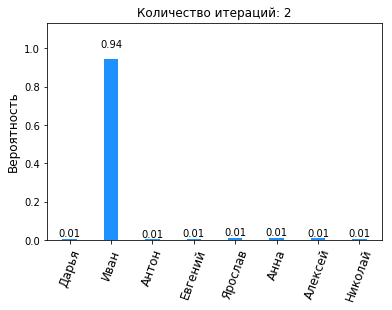

Имя: "001" -> "Иван"
Номер телефона: +48-92

=== === ===



In [30]:
result = execute(qc, backend='local_qasm_simulator', shots=shots).result()
plot_histogram(result.get_counts(), title='Количество итераций: {}'.format(i),
               name_mapping=name_mapping)

number, name = most_probable_result(result).split()
print('Имя: "{}" -> "{}"'.format(name, name_mapping[name]))
print('Номер телефона:', number_mapping[number])

print('')
print('=== === ===')
print('')

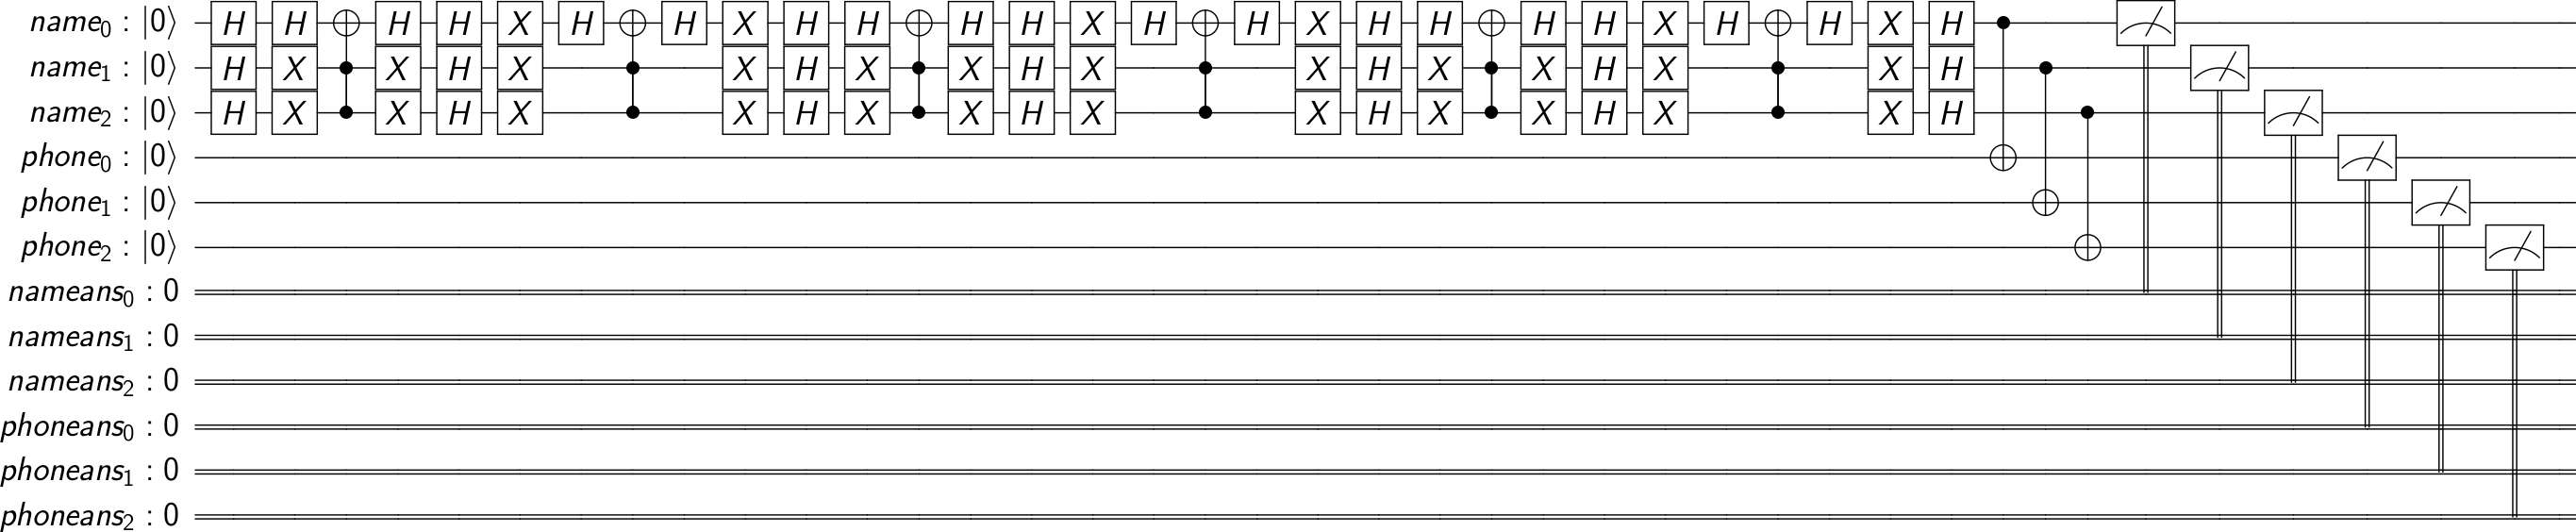

In [27]:
i = 3

qc = utils.build_grover_search_qc(n, i, query)

phone = QuantumRegister(n, name='phone')
qc.add(phone)
ansphone = ClassicalRegister(n, name='phoneans')
qc.add(ansphone)

qc.cx(qc.get_qregs()['name'], qc.get_qregs()['phone'])

qc.measure(qc.get_qregs()['name'], qc.get_cregs()['nameans'])
qc.measure(qc.get_qregs()['phone'], qc.get_cregs()['phoneans'])

circuit_drawer(qc)

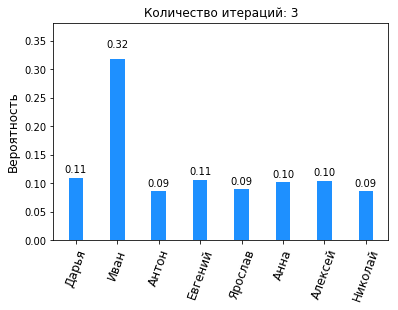

Имя: "001" -> "Иван"
Номер телефона: +48-92

=== === ===



In [28]:
result = execute(qc, backend='local_qasm_simulator', shots=shots).result()
plot_histogram(result.get_counts(), title='Количество итераций: {}'.format(i),
               name_mapping=name_mapping)

number, name = most_probable_result(result).split()
print('Имя: "{}" -> "{}"'.format(name, name_mapping[name]))
print('Номер телефона:', number_mapping[number])

print('')
print('=== === ===')
print('')

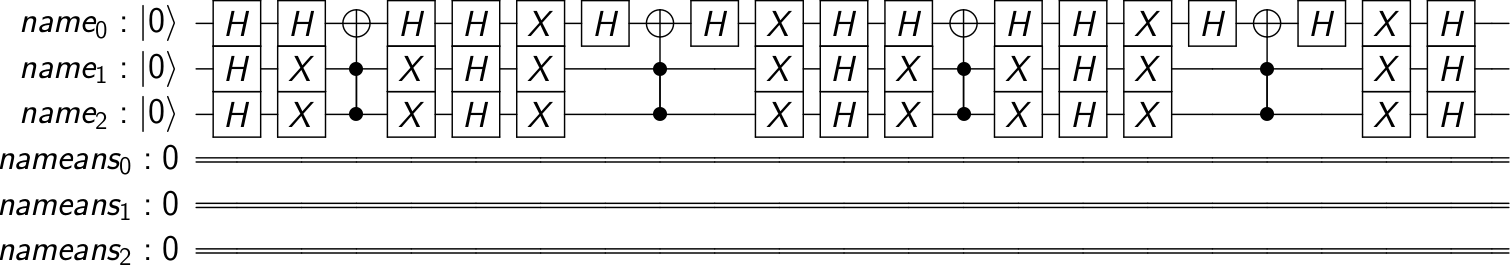

In [94]:
i = 2

qc = utils.build_grover_search_qc(n, i, query)

# phone = QuantumRegister(n, name='phone')
# qc.add(phone)
# ansphone = ClassicalRegister(n, name='phoneans')
# qc.add(ansphone)

# qc.cx(qc.get_qregs()['name'], qc.get_qregs()['phone'])

# qc.measure(qc.get_qregs()['name'], qc.get_cregs()['nameans'])
# qc.measure(qc.get_qregs()['phone'], qc.get_cregs()['phoneans'])

circuit_drawer(qc)

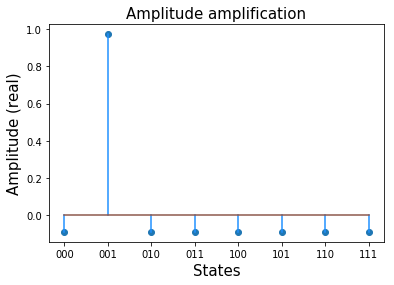

In [95]:
statevector = execute(qc, backend='local_statevector_simulator_py',
                      shots=1).result().get_data()['statevector']
utils.plot_statevector(statevector)

# Grover only

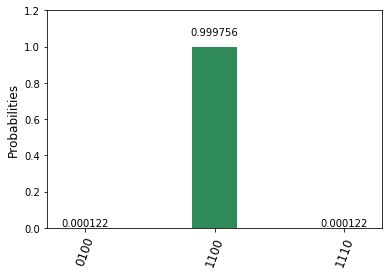

In [85]:
#qc.measure(f_in, ans)
problem = execute(qc, backend='local_qasm_simulator', shots=8192)
print(problem)
result = problem.result()
counts = result.get_counts()
plot_histogram(counts)
result

# k-SAT

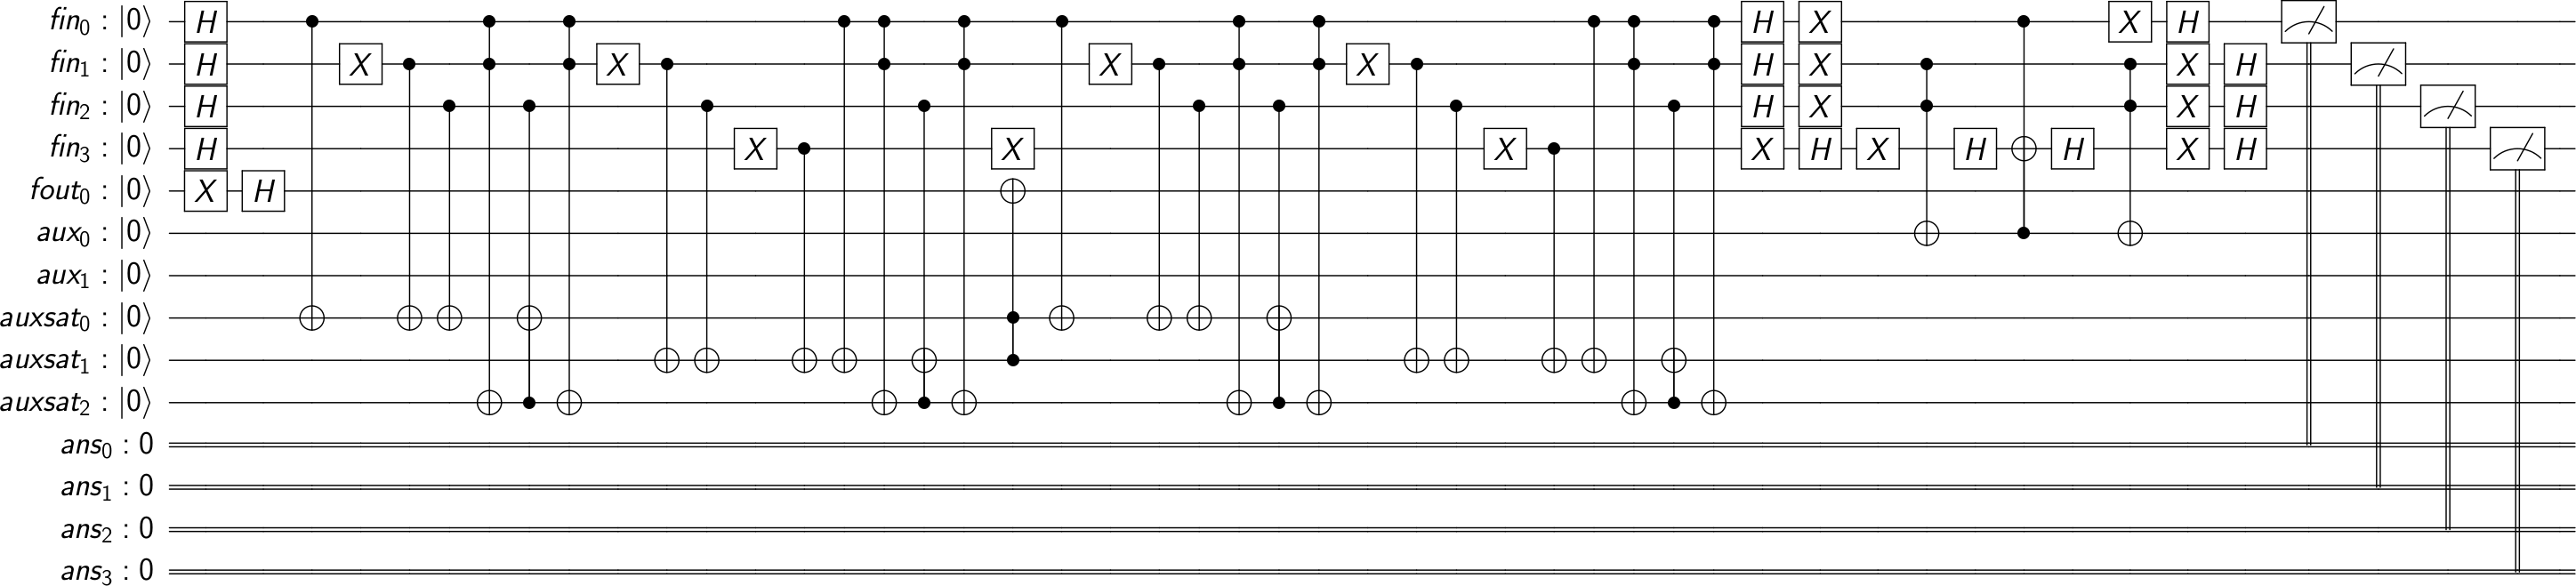

In [69]:
n = 4  # Number of qubits.
sat_formula = [[1, -2, 3], [2, 3, -4, 1]]

f_in = QuantumRegister(n, name='fin')
f_out = QuantumRegister(1, name='fout')
aux_sat = QuantumRegister(len(sat_formula) + 1, name='auxsat')
ans = ClassicalRegister(n, name='ans')

n_controls = n

aux = None
qc = None
if n_controls > 2:
    aux = QuantumRegister(n_controls - 2, name='aux')
    qc = QuantumCircuit(f_in, f_out, aux, aux_sat, ans, name='grover')
else:
    qc = QuantumCircuit(f_in, f_out, aux_sat, ans, name='grover')

input_state(qc, f_in, f_out)
black_box_u_f(qc, f_in, f_out, aux_sat, n, sat_formula)
inversion_about_average(qc, f_in, aux, n)

qc.measure(f_in, ans)

circuit_drawer(qc)

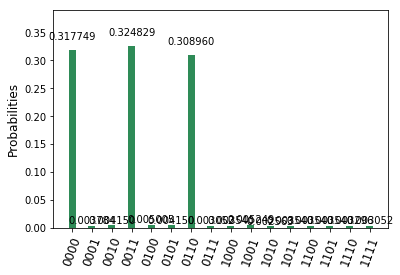

In [70]:
result = execute(qc, backend='local_qasm_simulator', shots=8192).result()
counts = result.get_counts('grover')
plot_histogram(counts)